In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)), X]
m = len(X_b)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameter

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

"""
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
"""

'\nfor epoch in range(n_epochs):\n    for i in range(m):\n        random_index = np.random.randint(m)\n        xi = X_b[random_index:random_index+1]\n        yi = y[random_index:random_index+1]\n        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)\n        eta = learning_schedule(epoch * m + i)\n        theta = theta - eta * gradients\n'

In [3]:
theta

array([[0.01300189],
       [1.45353408]])

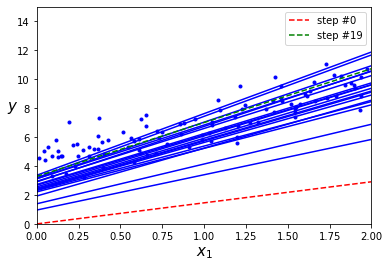

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

plt.plot(X, y, 'b.')  # data set
for epoch in range(n_epochs):
    for i in range(m):
        if i < 20 and epoch == 0:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            style = 'g--' if i == 19 else style
            if i == 0 or i == 19:
                label = "step #" + str(i)
            else:
                label = ""
            plt.plot(X_new, y_predict, style, label=label)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$y$', fontsize=15, rotation=0)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show() 

In [5]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [6]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25308539]), array([2.84721086]))

***
## 다항 회귀 polynomial

In [7]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [9]:
X.shape, y.shape

((100, 1), (100, 1))

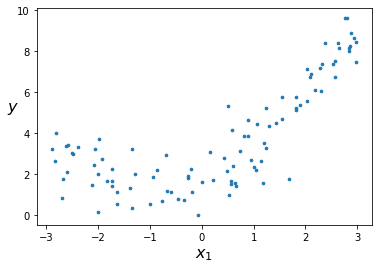

In [14]:
plt.scatter(X, y, 7)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.show()

#### 만들어진 데이터 셋은 비선형 데이터의 형태를 띄고 있다.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [16]:
X_poly = poly_features.fit_transform(X)

In [17]:
X[0]

array([0.52161904])

In [18]:
X_poly[0]

array([0.52161904, 0.27208642])

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.81603967]), array([[0.95549329, 0.50407025]]))

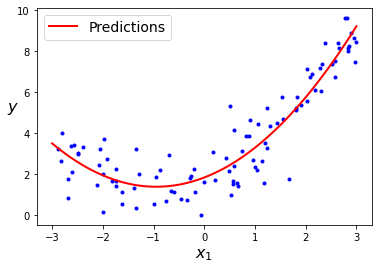

In [26]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label="Predictions")
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', rotation=0, fontsize=16)
plt.legend(loc="upper left", fontsize=14)
plt.show()